In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://rb.gy/gsmddu')
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [5]:
# for find top 5 Power Station
most_freq = df['Power Station'].value_counts().head().index.tolist()
most_freq

['NTPC Ltd.', 'NHPC', 'NPCIL', 'GMR ENERG', 'JSWEL']

In [8]:
filter_df = df[df['Power Station'].isin(most_freq)]
filter_df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
28,2017-09-01,NHPC,4154.20,217.00,0.0,206.0,0,69,75,6.01,0.0
30,2017-09-01,NPCIL,1520.00,0.00,0.0,0.0,0,30,35,5.21,0.0
32,2017-09-01,NTPC Ltd.,12659.06,3364.66,710.0,995.0,0,182,162,-19.98,0.0
61,2017-09-01,GMR ENERG,600.00,300.00,0.0,300.0,0,9,6,-3.03,0.0
66,2017-09-01,JSWEL,1200.00,300.00,0.0,300.0,0,20,15,-4.35,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345246,2022-04-13,GMR ENERG,1050.00,0.00,0.0,0.0,0,0,25,2.53,0.0
345257,2022-04-13,NHPC,862.00,146.00,0.0,0.0,146,0,11,2.76,0.0
345260,2022-04-13,NTPC Ltd.,11730.00,1105.00,500.0,500.0,105,0,246,12.26,0.0
345270,2022-04-13,NHPC,105.00,35.00,0.0,35.0,0,0,0,-0.72,0.0


In [15]:
encoder = LabelEncoder()
filter_df['Power Station'] = encoder.fit_transform(filter_df['Power Station'])

C:\Users\huzai\AppData\Local\Temp\ipykernel_53100\1494969213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Power Station'] = encoder.fit_transform(filter_df['Power Station'])


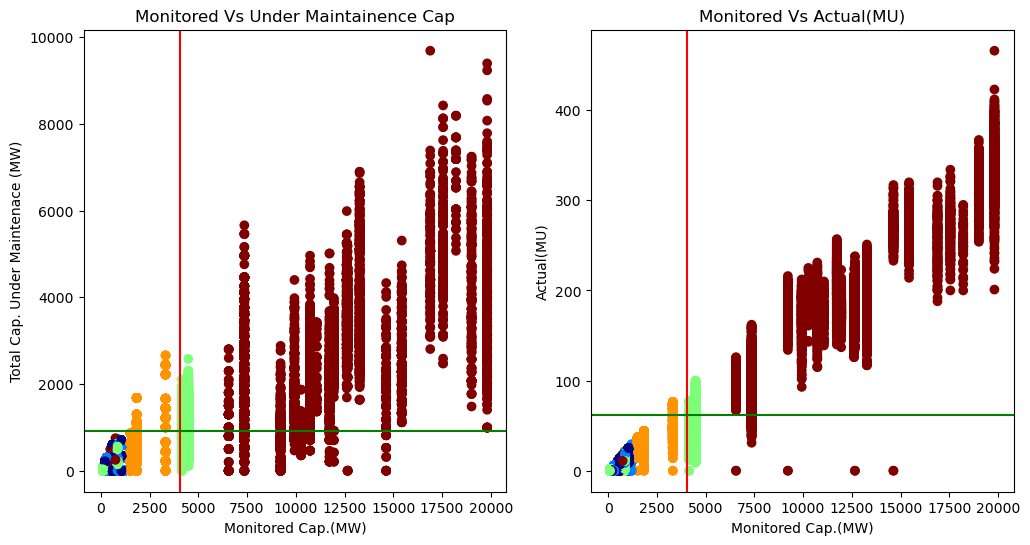

In [37]:
fig , ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(filter_df['Monitored Cap.(MW)'],filter_df['Total Cap. Under Maintenace (MW)'],c=filter_df['Power Station'],cmap='jet')
ax[0].axvline(filter_df['Monitored Cap.(MW)'].mean(),color='red')
ax[0].axhline(filter_df['Total Cap. Under Maintenace (MW)'].mean(),color='green')
ax[0].set_xlabel("Monitored Cap.(MW)")
ax[0].set_ylabel("Total Cap. Under Maintenace (MW)")
ax[0].set_title("Monitored Vs Under Maintainence Cap")

ax[1].scatter(filter_df['Monitored Cap.(MW)'],filter_df['Actual(MU)'],c=filter_df['Power Station'],cmap='jet')
ax[1].axvline(filter_df['Monitored Cap.(MW)'].mean(),color='red')
ax[1].axhline(filter_df['Actual(MU)'].mean(),color='green')
ax[1].set_xlabel("Monitored Cap.(MW)")
ax[1].set_ylabel("Actual(MU)")
ax[1].set_title("Monitored Vs Actual(MU)")
plt.show()

### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

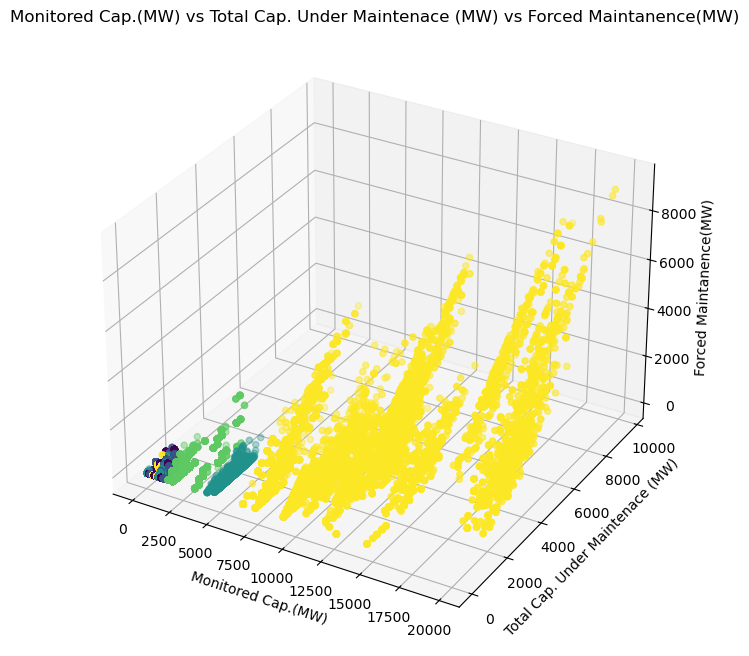

In [48]:
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(projection='3d')
ax.scatter3D(filter_df['Monitored Cap.(MW)'],filter_df['Total Cap. Under Maintenace (MW)'],filter_df['Forced Maintanence(MW)'],c=filter_df['Power Station'])
ax.set_xlabel("Monitored Cap.(MW)")
ax.set_ylabel("Total Cap. Under Maintenace (MW)")
ax.set_zlabel("Forced Maintanence(MW)")
ax.set_title("Monitored Cap.(MW) vs Total Cap. Under Maintenace (MW) vs Forced Maintanence(MW)")
plt.show()

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$$$$$

In [50]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
print(x,y)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [53]:
xx,yy = np.meshgrid(x,y)
xx.shape

(100, 100)

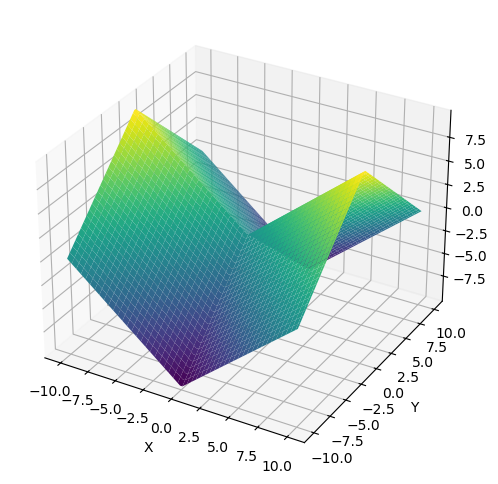

In [56]:
z = np.abs(xx) - np.abs(yy)
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(projection='3d')
ax.plot_surface(xx,yy,z, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

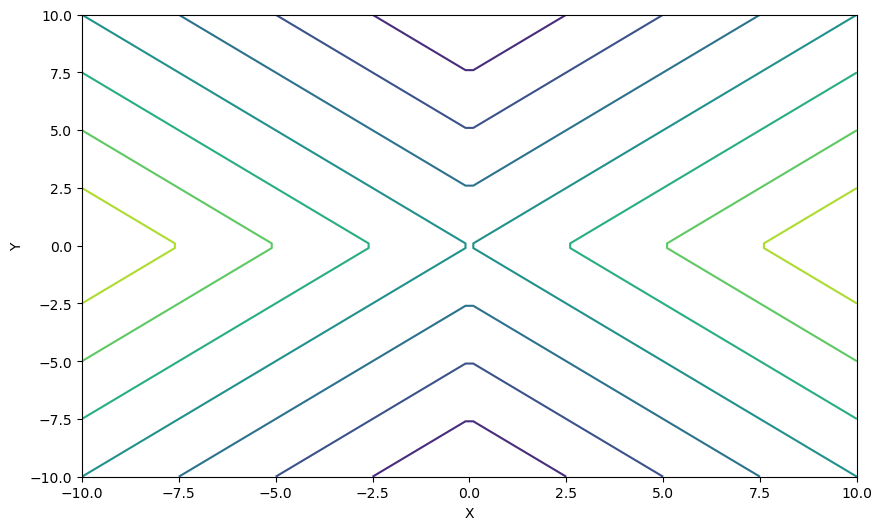

In [58]:
z = np.abs(xx) - np.abs(yy)
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.contour(xx,yy,z, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

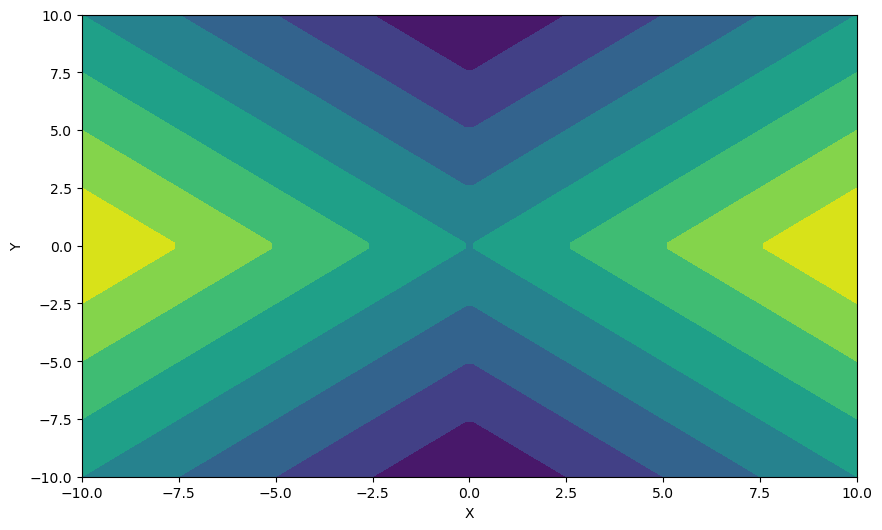

In [59]:
z = np.abs(xx) - np.abs(yy)
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.contourf(xx,yy,z, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover: 

In [2]:
nifty = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSbaY6bnKXIj_ULv1eqkGirBYs7zYCA4mfmc9GbxR-epMX3Xkpe6sKndOpiKS19S2V3fIHZwDKFMYBe/pub?gid=1895610445&single=true&output=csv')
nifty.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN


### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [3]:
nifty['Date'] = pd.to_datetime(nifty['Date'])

In [9]:
# for filtering only 2020 year
year_2020 = nifty[nifty.index.year == 2020]
year_2020

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,
2020-01-01,HDFCBANK,EQ,1272.10,1276.10,1280.00,1270.60,1279.00,1278.60,1276.64,1836849,2.345001e+14,46625.0
2020-01-02,HDFCBANK,EQ,1278.60,1279.00,1288.00,1279.00,1286.00,1286.75,1284.56,3068583,3.941792e+14,104570.0
2020-01-03,HDFCBANK,EQ,1286.75,1282.20,1285.00,1263.60,1268.50,1268.40,1270.48,5427775,6.895886e+14,157066.0
2020-01-06,HDFCBANK,EQ,1268.40,1260.00,1261.80,1236.00,1240.25,1240.95,1247.24,5445093,6.791348e+14,155007.0
2020-01-07,HDFCBANK,EQ,1240.95,1258.90,1271.45,1252.25,1261.00,1260.60,1261.48,7362247,9.287302e+14,189026.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,POWERGRID,EQ,189.95,190.25,192.25,189.45,190.00,190.00,190.18,7281646,1.384822e+14,25895.0
2020-12-28,POWERGRID,EQ,190.00,190.20,192.30,190.00,191.00,191.55,191.16,3869826,7.397376e+13,31715.0
2020-12-29,POWERGRID,EQ,191.55,191.60,192.65,189.00,189.50,189.70,190.01,4809185,9.137822e+13,56720.0


In [11]:
year_2020.groupby('Symbol')['Turnover'].sum()

Symbol
ADANIPORTS    9.093770e+16
ASIANPAINT    2.232439e+17
AXISBANK      6.435798e+17
BAJAJ-AUTO    1.228023e+17
BAJAJFINSV    2.702622e+17
BAJFINANCE    1.025129e+18
BHARTIARTL    5.182308e+17
BPCL          1.867166e+17
BRITANNIA     1.304423e+17
CIPLA         2.441568e+17
COALINDIA     9.397232e+16
DRREDDY       3.296627e+17
EICHERMOT     2.061956e+17
GAIL          8.507428e+16
GRASIM        1.330305e+17
HCLTECH       2.390651e+17
HDFC          5.218117e+17
HDFCBANK      7.704609e+17
HEROMOTOCO    1.977834e+17
HINDALCO      1.340135e+17
HINDUNILVR    3.953341e+17
ICICIBANK     6.961710e+17
INDUSINDBK    6.214173e+17
INFY          4.731615e+17
IOC           9.432658e+16
ITC           2.657241e+17
JSWSTEEL      1.152553e+17
KOTAKBANK     4.005289e+17
LT            2.691044e+17
M&M           1.652936e+17
MARUTI        4.076048e+17
NESTLEIND     1.198763e+17
NTPC          1.215010e+17
ONGC          1.068178e+17
POWERGRID     1.097107e+17
RELIANCE      1.551544e+18
SBIN          6.62806

In [12]:
year_2020.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False)

Symbol
RELIANCE      1.551544e+18
BAJFINANCE    1.025129e+18
HDFCBANK      7.704609e+17
ICICIBANK     6.961710e+17
SBIN          6.628064e+17
AXISBANK      6.435798e+17
INDUSINDBK    6.214173e+17
HDFC          5.218117e+17
BHARTIARTL    5.182308e+17
INFY          4.731615e+17
TCS           4.533464e+17
TATAMOTORS    4.149685e+17
MARUTI        4.076048e+17
KOTAKBANK     4.005289e+17
HINDUNILVR    3.953341e+17
DRREDDY       3.296627e+17
TATASTEEL     3.239435e+17
BAJAJFINSV    2.702622e+17
LT            2.691044e+17
ITC           2.657241e+17
SUNPHARMA     2.500230e+17
ZEEL          2.461417e+17
CIPLA         2.441568e+17
WIPRO         2.418746e+17
HCLTECH       2.390651e+17
ASIANPAINT    2.232439e+17
EICHERMOT     2.061956e+17
HEROMOTOCO    1.977834e+17
BPCL          1.867166e+17
TITAN         1.833234e+17
TECHM         1.653302e+17
M&M           1.652936e+17
VEDL          1.640282e+17
UPL           1.459127e+17
ULTRACEMCO    1.357168e+17
HINDALCO      1.340135e+17
GRASIM        1.33030

In [16]:
year_2020.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head()

Symbol
RELIANCE      1.551544e+18
BAJFINANCE    1.025129e+18
HDFCBANK      7.704609e+17
ICICIBANK     6.961710e+17
SBIN          6.628064e+17
Name: Turnover, dtype: float64

In [17]:
year_2020.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head().index

Index(['RELIANCE', 'BAJFINANCE', 'HDFCBANK', 'ICICIBANK', 'SBIN'], dtype='object', name='Symbol')

In [18]:
top_5 = year_2020.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head().index

In [20]:
year_2020[year_2020['Symbol'].isin(top_5)]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
Date,,,,,,,,,,,,
2020-01-01,HDFCBANK,EQ,1272.10,1276.10,1280.00,1270.60,1279.00,1278.60,1276.64,1836849,2.345001e+14,46625.0
2020-01-02,HDFCBANK,EQ,1278.60,1279.00,1288.00,1279.00,1286.00,1286.75,1284.56,3068583,3.941792e+14,104570.0
2020-01-03,HDFCBANK,EQ,1286.75,1282.20,1285.00,1263.60,1268.50,1268.40,1270.48,5427775,6.895886e+14,157066.0
2020-01-06,HDFCBANK,EQ,1268.40,1260.00,1261.80,1236.00,1240.25,1240.95,1247.24,5445093,6.791348e+14,155007.0
2020-01-07,HDFCBANK,EQ,1240.95,1258.90,1271.45,1252.25,1261.00,1260.60,1261.48,7362247,9.287302e+14,189026.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,SBIN,EQ,263.00,265.00,268.85,264.65,266.85,266.85,267.02,28585509,7.632821e+14,167695.0
2020-12-28,SBIN,EQ,266.85,268.75,276.00,268.00,275.75,275.20,272.23,36870242,1.003740e+15,203967.0
2020-12-29,SBIN,EQ,275.20,276.30,279.90,274.70,277.75,277.90,277.56,45032526,1.249930e+15,237470.0


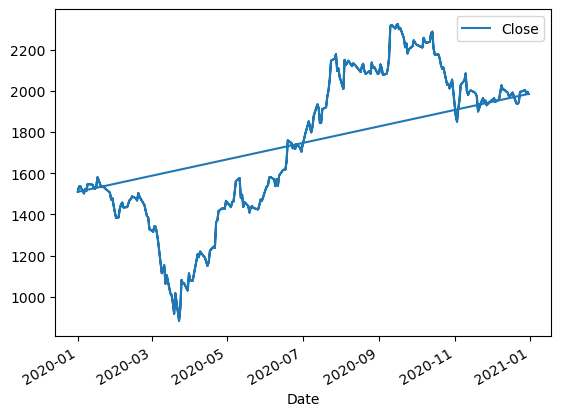

In [31]:
ax = year_2020[year_2020.Symbol=='RELIANCE'].plot(y='Close', use_index=True)

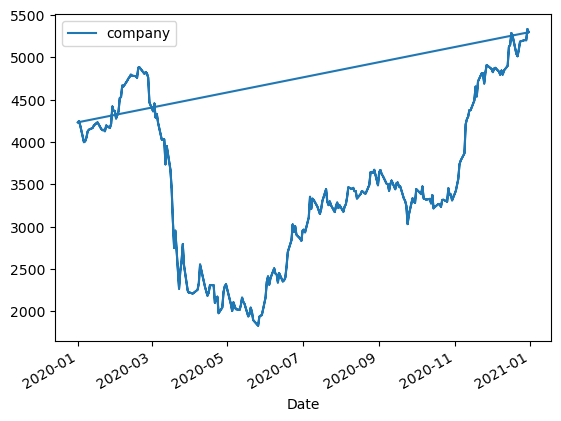

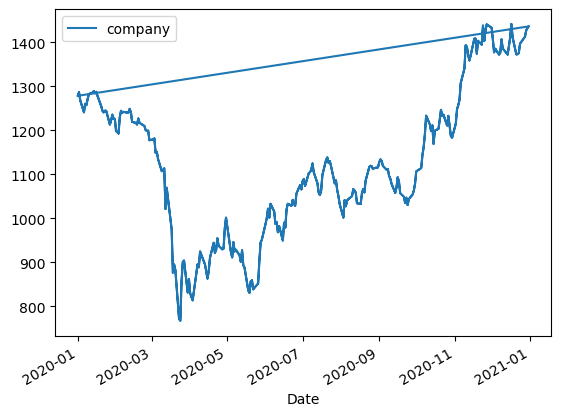

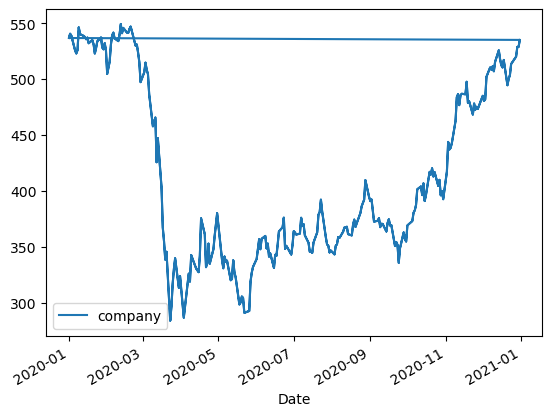

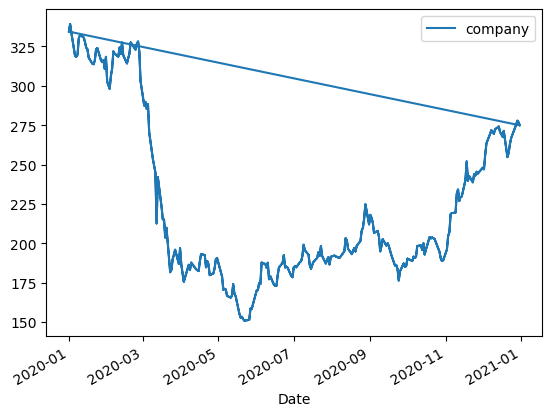

In [32]:
for company in top_5[1:]:
    year_2020[year_2020.Symbol == company].plot(y='Close',use_index=True, label = 'company')

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

<Axes: xlabel='Close', ylabel='Volume'>

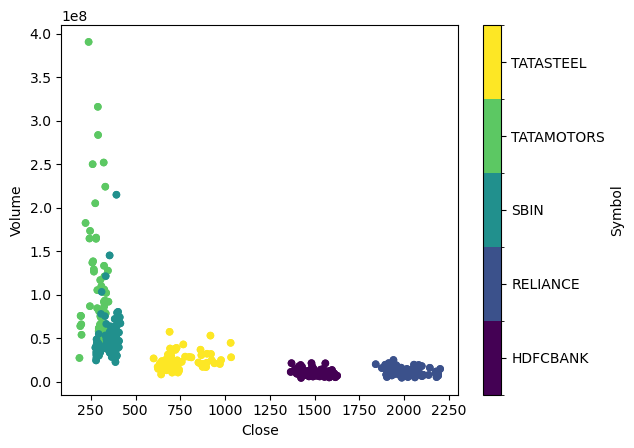

In [33]:
# code here
temp_df = nifty[nifty.index.year == 2021]
top_5 = temp_df.groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head().index
temp_df = temp_df[temp_df['Symbol'].isin(top_5)]

temp_df['Symbol'] = temp_df['Symbol'].astype('category')
temp_df.plot(kind='scatter', x='Close', y='Volume', c='Symbol', colormap='viridis')

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [34]:
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
data

,time,x,y,z
0,0.00000,0.000000,1.000000,0.00000
1,0.10101,0.100838,0.994903,0.10101
2,0.20202,0.200649,0.979663,0.20202
3,0.30303,0.298414,0.954437,0.30303
4,0.40404,0.393137,0.919480,0.40404
...,...,...,...,...
95,9.59596,-0.170347,-0.985384,9.59596
96,9.69697,-0.268843,-0.963184,9.69697
97,9.79798,-0.364599,-0.931165,9.79798
98,9.89899,-0.456637,-0.889653,9.89899


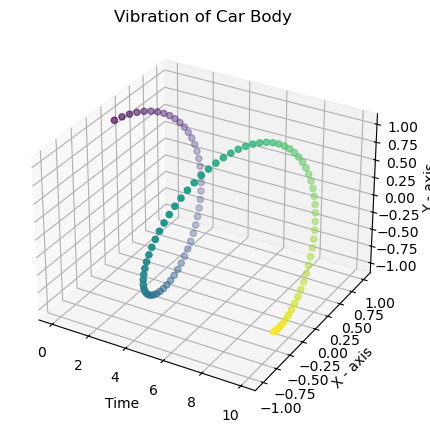

In [46]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(projection='3d')
ax.scatter(data['time'],data['x'],data['y'],c=data['z'])
ax.set_xlabel("Time")
ax.set_ylabel("X - axis")
ax.set_zlabel("Y - axis")
ax.set_title("Vibration of Car Body")
plt.show()


### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


In [47]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx , yy = np.meshgrid(x,y)

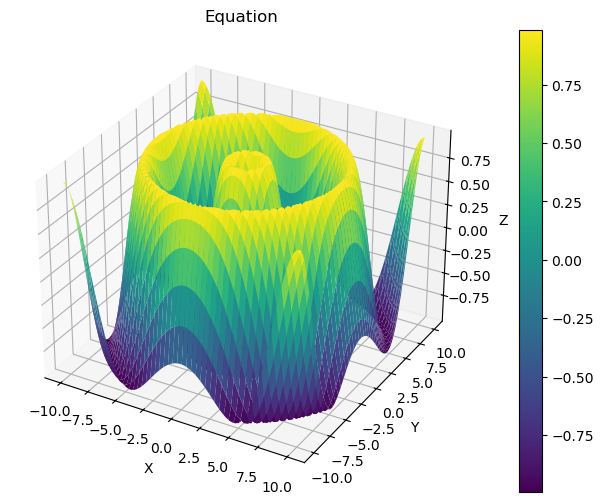

In [73]:
z = np.sin(np.sqrt(xx**2 + yy**2))
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection='3d')
p = ax.plot_surface(xx,yy,z,cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Equation")
fig.colorbar(p)
plt.show()

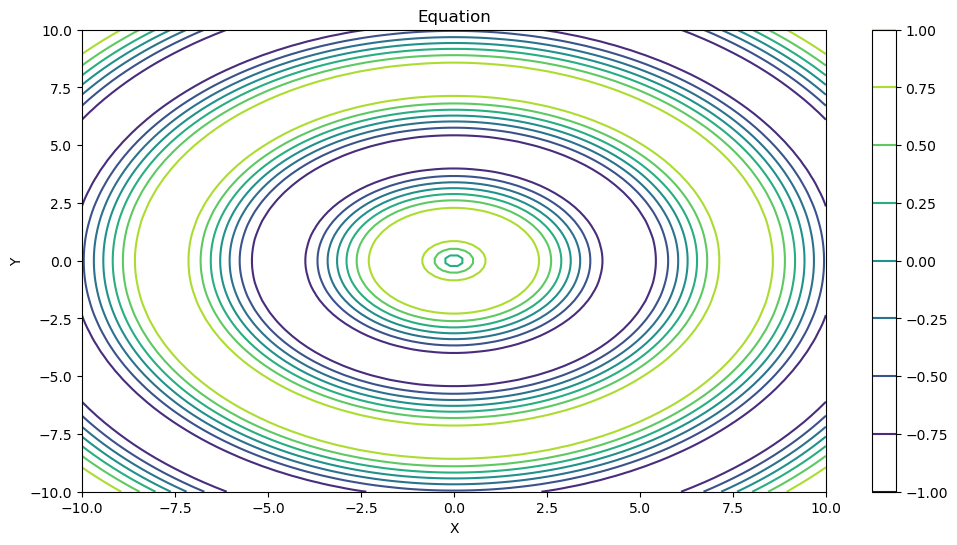

In [72]:
z = np.sin(np.sqrt(xx**2 + yy**2))
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()
p = ax.contour(xx,yy,z,cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Equation")
fig.colorbar(p)
plt.show()

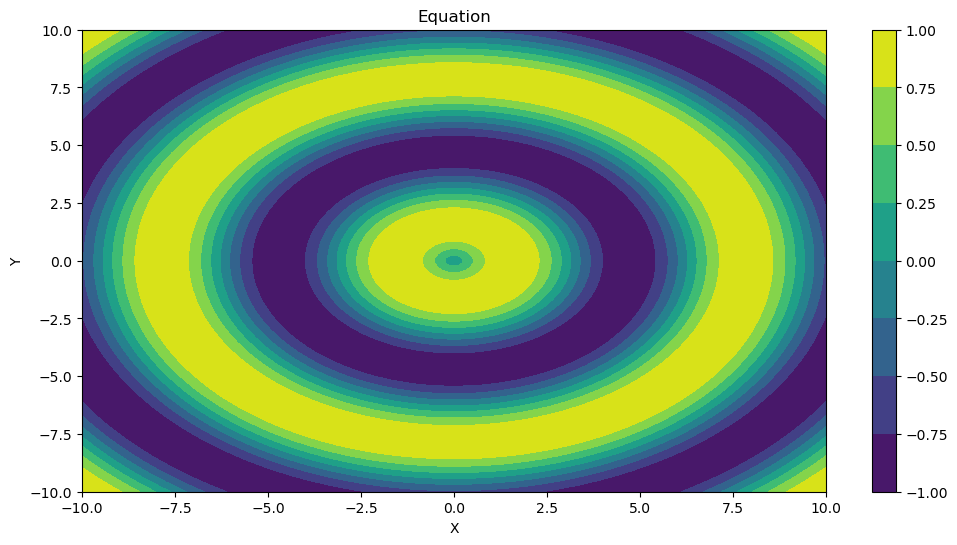

In [71]:
z = np.sin(np.sqrt(xx**2 + yy**2))
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()
p = ax.contourf(xx,yy,z,cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Equation")
fig.colorbar(p)
plt.show()

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

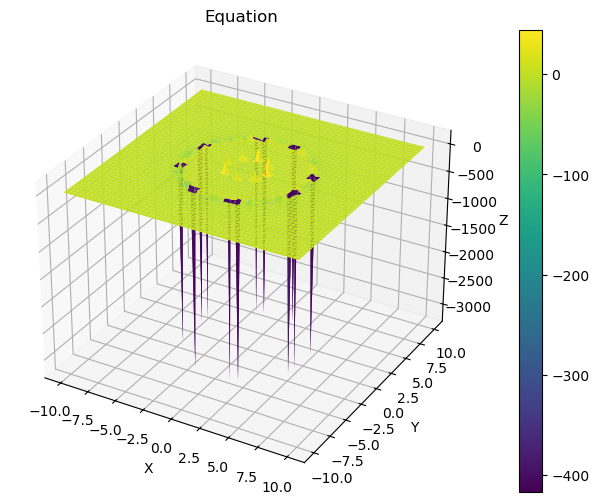

In [70]:
z = np.tan(np.log2(xx**2 + yy**2))
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection='3d')
p = ax.plot_surface(xx,yy,z,cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Equation")
fig.colorbar(p)
plt.show()

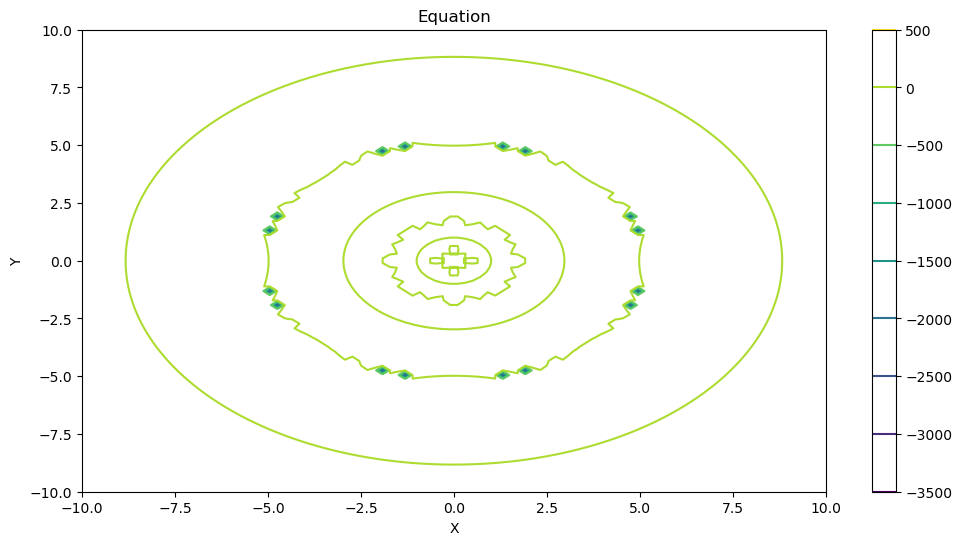

In [69]:
z = np.tan(np.log2(xx**2 + yy**2))
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()
p = ax.contour(xx,yy,z,cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.colorbar(p)
ax.set_title("Equation")
plt.show()

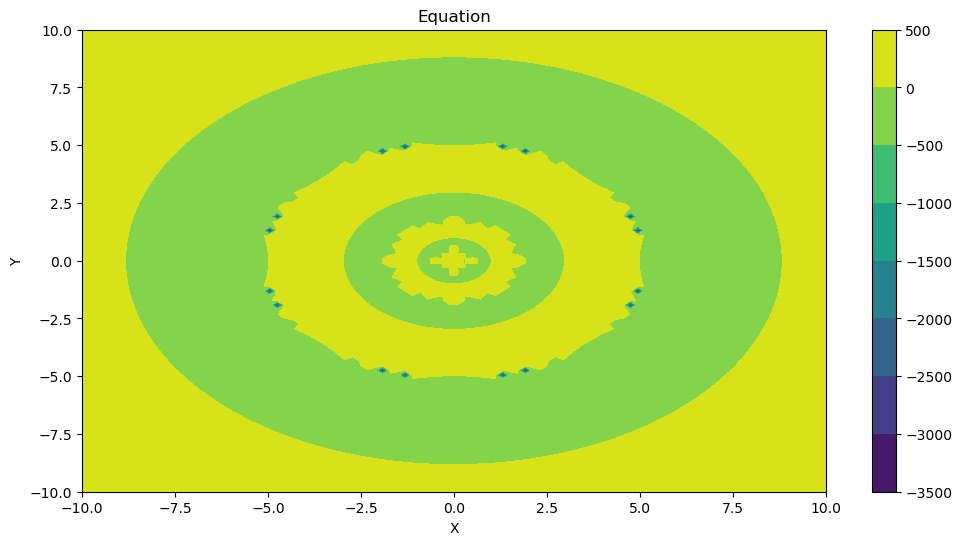

In [68]:
z = np.tan(np.log2(xx**2 + yy**2))
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()
p = ax.contourf(xx,yy,z,cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Equation")
fig.colorbar(p)
plt.show()